
<div align="center">

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangtgao/DS-UA_201-Causal-Inference-Spring-2025/blob/main/labs/11-Instrumental_Variables.ipynb)

</div>

$$
\begin{array}{c}
\textbf{CAUSAL INFERENCE}\\\\
\textbf{Xiang Gao} \\
\textit{Center for Data Science, New York University} \\\\
\textit{Apr 18, 2025}\\\\\\
\text{Materials prepared by: Daniela Pinto Veizaga, Xiang Pan, and Xiang Gao}
\end{array}
$$

---

# Instrumental Variables

Imagine we want to estimate the **causal effect** of a treatment variable, $S$, on some outcome, $Y$. But there’s a problem: we suspect that $S$ is **correlated with unobserved factors** that also affect $Y$. These unobserved factors are captured by the variable $U$. This means:

$$S \not\!\perp\!\!\!\perp U,$$

In other words, $S$ and $U$ are related, which can lead to **biased and inconsistent estimates** when we try to estimate the causal effect of $S$ on $Y$.

> **But is there a way to estimate the causal effect despite this problem?**  
**Yes!** We can use an **instrumental variable (IV)** to help us out.

### What is an Instrumental Variable?

An **instrumental variable (IV)**, denoted by $Z$, is a variable that:
- **Affects** the treatment variable $S$.
- Has **no direct effect** on the outcome variable $Y$.
- Is **independent** of the unobserved confounders $U$ that are correlated with both $S$ and $Y$.

The goal is that the instrument $Z$ can help us isolate the variation in $S$ that is **uncorrelated** with the unobserved confounders $U$, allowing us to estimate a more accurate causal effect.

<img src="https://raw.githubusercontent.com/dapivei/causal-infere/main/images/instrument.png" width="500"/>

### When Should We Use IVs?

Instrumental Variables are especially useful when:
> - The treatment variable $S$ suffers from **measurement error**, **omitted variable bias**, or **reverse causality** (where $Y$ affects $S$ instead of the other way around).

### Key Assumptions for a Valid Instrument

For $Z$ to be a valid instrument, it must satisfy three important assumptions:

1. **Exogeneity**:  
   The instrument $Z$ must be **uncorrelated** with the error term $U$ (or other unobserved factors that affect $S$), i.e., $Z$ must not be influenced by any variables that also affect $Y$. This assumption ensures that $Z$ affects $S$ but not $Y$ directly.  
   $$ U \perp Z \quad \text{and} \quad V \perp Z $$

2. **Relevance**:  
   The instrument $Z$ must have a **significant** effect on the treatment $S$. In other words, $Z$ should change the likelihood that someone receives the treatment $S$, at least for some sub-group of the population.  
   $$ S(Z=1, V) \neq S(Z=0, V) $$

3. **Monotonicity**:  
   The instrument $Z$ must affect $S$ in the **same direction** for all individuals. That is, $Z$ should only either **increase** or **decrease** the likelihood of receiving treatment, but not both.  
   $$ S(Z=1, V) > S(Z=0, V) $$

### Local Average Treatment Effect (LATE)

If these assumptions hold, we can estimate the **Local Average Treatment Effect (LATE)**. This is the causal effect of $S$ on $Y$ for a specific group of people called the **compliers**—those whose treatment status is affected by the instrument $Z$.

> **Compliers** are individuals whose treatment $S$ is influenced by the instrument $Z$. They are the population we can estimate the causal effect for using IVs.


### Types of Individuals in IV Analysis

The population can be divided into four groups based on how they respond to the instrument $Z$:

1. **Always-takers**: These individuals always take the treatment, regardless of the instrument $Z$.  
   $$ S(Z=1, V) = S(Z=0, V) = 1 $$

2. **Never-takers**: These individuals never take the treatment, regardless of the instrument $Z$.  
   $$ S(Z=1, V) = S(Z=0, V) = 0 $$

3. **Compliers**: These individuals comply with the instrument. They take the treatment when $Z = 1$, but not when $Z = 0$.  
   $$ S(Z=1, V) = 1 \quad \text{and} \quad S(Z=0, V) = 0 $$

4. **Defiers**: These individuals do the opposite of what the instrument suggests. They take the treatment when $Z = 0$, but not when $Z = 1$.  
   $$ S(Z=1, V) = 0 \quad \text{and} \quad S(Z=0, V) = 1 $$

### Identifying the Local Average Treatment Effect (LATE)

Now, let’s define the causal model for $Y$ in terms of $S$ and $U$:

$$ Y = \alpha_0 + \alpha_1 S + U, $$

where $\alpha_1$ represents the **causal effect** of $S$ on $Y$, and $U$ is the error term (which captures unobserved factors that affect $Y$).

Assuming:

 $$\mathbb{E}[U]=0\quad and  \quad \mathbb{E}[ZU]=0$$ and given instrument relevance $Cov(Z,S)\neq 0$, we obtain:

$$ \alpha_1^{IV} = \frac{\text{Cov}(Z,Y)}{\text{Cov}(Z,S)} $$

This is the **Wald estimator**. We can rewrite it in terms of expectations for a binary instrument:

$$ \alpha_1^{IV} = \frac{\mathbb{E}[Y | Z=1] - \mathbb{E}[Y | Z=0]}{\mathbb{E}[S | Z=1] - \mathbb{E}[S | Z=0]} $$

Under our LATE assumptions, the Wald estimator identifies the LATE:

$$\alpha_{IV} = \frac{\mathbb{E}[Y|Z =1]-\mathbb{E}[Y|Z =0]}{\mathbb{E}[S|Z =1]-\mathbb{E}[S|Z =0]}
=\mathbb{E}[Y(S =1,U)−Y(S =0,U)|Complier]= LATE$$

> Thus, **LATE** is the **difference in outcomes** between those who received the treatment and those who did not, **for the compliers**.


## Motivating Case: The effect of watching sesame street on later academic achievement.




<img src="https://www.aeaweb.org/content/file?id=8888.png?raw=true" width="500" height="auto" />



### Research Question

> Does watching Sesame Street ($S$) have a positive impact on later academic achievement ($Y$)?


### Model Setup

\begin{aligned}
S & =\left\{\begin{array}{l}
1 \text { if watched Sesame }  \\
0 \text { did not watched Sesame}
\end{array}\right. \\
Y(S, U) & =\text {Score on a literacy test} \\
U & =\text { other determinants of } Y,
\end{aligned}

where $U$ represents other determinants of $Y$ (e.g., socio-economic status).


### The challenge


$$S \not\!\perp\!\!\!\perp U,$$

as various family and individual factors likely influence whether a child watches the program $S$ and the child's later academic outcomes ($Y$).

> It's difficult to isolate the effect of watching Sesame Street on academic achievement from unobserved confounders, such as socio-economic status. These unobserved factors may influence both:
+  a child's likelihood of watching the program and
+ their academic outcomes,

leading to biased estimates.


### Solution?

Introduce an instrumental variable —**encouragement** $Z$ —which we can control and randomize. In this context, encouragement refers to providing children with additional information or motivational support to watch Sesame Street. This approach aligns with the original proposal by [Ball & Bogatz (1970)](https://files.eric.ed.gov/fulltext/ED068155.pdf), who explored the impact of such encouragement on children's engagement with educational media.


\begin{aligned}
Z & =\left\{\begin{array}{l}
1 \text { if encouraged  }  \\
0 \text { not encouraged}
\end{array}\right. \\
\end{aligned}


Our IV allows us to estimate the causal effect of watching Sesame Street on academic achievement for a specific subgroup: the **compliers**, or those whose likelihood of watching the program is influenced by the encouragement $Z$.

> How does watching Sesame Street $S$ impact academic achievement $Y$ for children whose likelihood of watching the program is influenced by the encouragement $Z$?


### Data

- **`encour`**: Indicator variable for whether the child was encouraged to watch Sesame Stree. Instrument $Z$.
- **`watched`**: Indicator variable for whether the child actually watched Sesame Street. Treatment $S$.
- **`letters`**: Score on a literacy test. Outcome $Y$.
- **`age`**: Age of the child (in months), included as a control variable.
- **`female`**: Indicator variable for gender (female), included as a control variable.
- **`Other variables`**: Various additional factors.


In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

from matplotlib.colors import LinearSegmentedColormap
from scipy import stats


sesame = pd.read_csv("sesame.csv")
sesame.head()

,rownames,id,site,sex,age,viewcat,setting,viewenc,prebody,prelet,...,encour,_Isite_2,_Isite_3,_Isite_4,_Isite_5,regular,watched,encouraged,y,pretest
0,1,1,1,1,66,1,2,1,16,23,...,1,0,0,0,0,0,0,1,30,23
1,2,2,1,2,67,3,2,1,30,26,...,1,0,0,0,0,1,1,1,37,26
2,3,3,1,1,56,3,2,2,22,14,...,0,0,0,0,0,1,1,0,46,14
3,4,4,1,1,49,1,2,2,23,11,...,0,0,0,0,0,0,0,0,14,11
4,5,5,1,1,69,4,2,2,32,47,...,0,0,0,0,0,1,1,0,63,47


In [2]:
sesame.columns

Index(['rownames', 'id', 'site', 'sex', 'age', 'viewcat', 'setting', 'viewenc',
       'prebody', 'prelet', 'preform', 'prenumb', 'prerelat', 'preclasf',
       'postbody', 'postlet', 'postform', 'postnumb', 'postrelat', 'postclasf',
       'peabody', 'agecat', 'encour', '_Isite_2', '_Isite_3', '_Isite_4',
       '_Isite_5', 'regular', 'watched', 'encouraged', 'y', 'pretest'],
      dtype='object')

In [3]:
sesame.describe()[['watched', 'encouraged']]

,watched,encouraged
count,240.000000,240.000000
mean,0.775000,0.633333
std,0.418455,0.482902
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


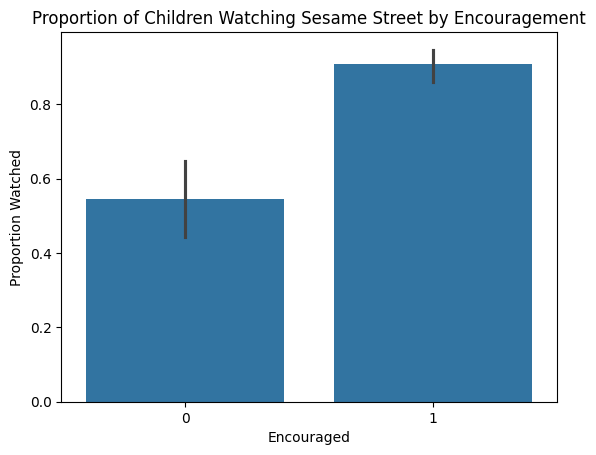

In [4]:
sns.barplot(x=sesame['encour'], y=sesame['watched'])
plt.title('Proportion of Children Watching Sesame Street by Encouragement')
plt.xlabel('Encouraged')
plt.ylabel('Proportion Watched')
plt.show()

Observe that children who were encouraged to watch the show had a notably higher proportion of viewers compared to those who were not encouraged. This difference suggests that ${\tt encouragement}$ effectively increases the likelihood of viewing Sesame Street.

### How plausible is ${\tt encouragement}$ as an instrument?


**Exogeneity**

We test whether encouragement is randomly assigned across relevant variables, ensuring balance between the encouraged and non-encouraged groups.

In [5]:
# List of variables to test for balance
variables_to_test = ['age', 'sex', 'pretest']

# Perform t-tests for each variable
for var in variables_to_test:

    # Split the data by encouragement status
    group_1 = sesame[sesame['encouraged'] == 1][var]
    group_0 = sesame[sesame['encouraged'] == 0][var]

    # Perform the t-test to compare means
    t_stat, p_value = stats.ttest_ind(group_1, group_0, equal_var=False)

    # Print results
    print(f'Test for {var}:')
    print(f'T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}')
    print('---')

    # Interpretation
    if p_value < 0.05:
        print(f"  Significant difference in {var}, suggests imbalance.\n")
    else:
        print(f"  No significant difference in {var}, supports balance.\n")


Test for age:
T-statistic: -0.3590, p-value: 0.7200
---
  No significant difference in age, supports balance.

Test for sex:
T-statistic: -0.3115, p-value: 0.7557
---
  No significant difference in sex, supports balance.

Test for pretest:
T-statistic: -1.4258, p-value: 0.1561
---
  No significant difference in pretest, supports balance.





**Relevance**

For the instrument to be relevant, it must be correlated with $S$ -- watching Sesame Street. Meaning that encouragement to watch Sesame Street has to actually make some kids more likely to watch it.

$$P(\text{Complier})>0 $$


If the encouragement has no effect—meaning kids are just as likely (or unlikely) to watch Sesame Street whether they’re encouraged or not—then encouragement isn’t a relevant instrument.

+ We test this using a linear regression model.


In [6]:
# Add a constant to the model
sesame['const'] = 1

# Fit a linear regression model (OLS) for relevance
relevance_model = sm.OLS(sesame['watched'], sesame[['const', 'encouraged']]).fit()
print(relevance_model.summary())


                            OLS Regression Results                            
Dep. Variable:                watched   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     50.46
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           1.40e-11
Time:                        06:06:29   Log-Likelihood:                -107.88
No. Observations:                 240   AIC:                             219.8
Df Residuals:                     238   BIC:                             226.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5455      0.041     13.434      0.0

+ The coefficient is 0.3624, meaning that being encouraged to watch Sesame Street increases the likelihood of watching the program by approximately 36.24% compared to those who were not encouraged.
+ Statistical Significance: The p-value for encouraged is 0.000, which is highly significant. This suggests that the encouragement to watch Sesame Street has a statistically significant effect on the outcome.



**Monotonicity**

Monotonicity means that encouragement to watch Sesame Street should only make kids more likely to watch it—never less likely. So, kids encouraged to watch Sesame Street are either more likely to watch or at least equally likely, but encouragement never makes them watch less.

+ Perform logistic regression to check for monotonicity, which ensures that the instrument  does not induce defiers (children who behave contrary to encouragement):

$$P(\text{Defier})=0 $$

In [7]:
monotonicity_model = sm.Logit(sesame['watched'], sesame[['const', 'encouraged', 'age', 'sex', 'site']]).fit()
print(monotonicity_model.summary())


Optimization terminated successfully.
         Current function value: 0.389264
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                watched   No. Observations:                  240
Model:                          Logit   Df Residuals:                      235
Method:                           MLE   Df Model:                            4
Date:                Fri, 18 Apr 2025   Pseudo R-squ.:                  0.2699
Time:                        06:07:11   Log-Likelihood:                -93.423
converged:                       True   LL-Null:                       -127.96
Covariance Type:            nonrobust   LLR p-value:                 3.564e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9288      1.841      1.048      0.295      -1.679       5.537
encouraged     2.5268      0.

+ Encouragement has a significant positive effect on the likelihood of watching Sesame Street ($p < 0.05$).
+ Age, sex, and site have less impact, which supports monotonicity.

Overall, our instrument seems pretty plausible!

#### Compliance Types

Let's further categorized our population of interest!


- **Compliers**: Watch Sesame Street only if encouraged.
- **Always-takers**: Watch Sesame Street regardless of encouragement.
- **Never-takers**: Do not watch Sesame Street regardless of encouragement.
- **Defiers**: Behave contrary to the encouragement (assumed to not exist due to monotonicity).

In [8]:
# Calculate proportions for each group
d_z_1 = sesame.loc[sesame['encour'] == 1, 'watched'].mean()
d_z_0 = sesame.loc[sesame['encour'] == 0, 'watched'].mean()

proportion_compliers = d_z_1 - d_z_0
proportion_always_takers = d_z_0
proportion_never_takers = 1 - d_z_1

# Assuming no Defiers
proportion_defiers = 0

In [9]:
proportion_compliers

np.float64(0.3624401913875599)

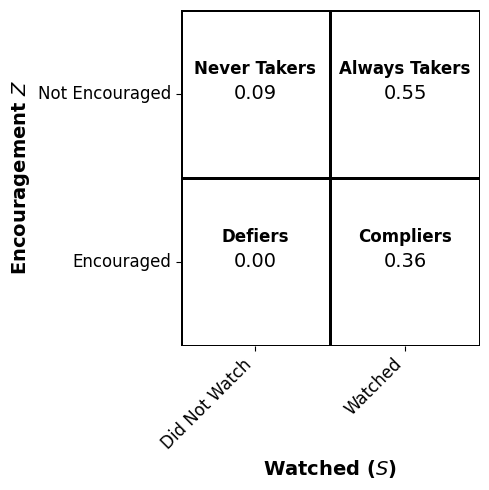

In [10]:
# Create the crosstab data directly
crosstab_data = pd.DataFrame({
    'Encouraged': ['Not Encouraged', 'Not Encouraged', 'Encouraged', 'Encouraged'],
    'Watched': ['Did Not Watch', 'Watched', 'Did Not Watch', 'Watched'],
    'Proportion': [proportion_never_takers, proportion_always_takers, proportion_defiers, proportion_compliers]
}).pivot(index='Encouraged', columns='Watched', values='Proportion')

# Reorder columns and index explicitly
crosstab_data = crosstab_data.reindex(index=['Not Encouraged', 'Encouraged'], columns=['Did Not Watch', 'Watched'])

# Define labels for each box
labels = {
    (0, 0): 'Never Takers',   # Not Encouraged, Did Not Watch
    (0, 1): 'Always Takers',        # Not Encouraged, Watched
    (1, 0): 'Defiers',  # Encouraged, Did Not Watch
    (1, 1): 'Compliers'       # Encouraged, Watched
}

# Plotting
plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(
    crosstab_data,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
    cbar=False,
    cmap=LinearSegmentedColormap.from_list('all_white', ['white', 'white']),
    annot_kws={"size": 14, "color": 'black'}
)

# Customizing the plot
plt.xlabel('Watched ($S$)', fontsize=14, fontweight='bold')
plt.ylabel('Encouragement $Z$', fontsize=14, fontweight='bold')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=12)

# Add custom labels
for (i, j), label in labels.items():
    plt.text(j + 0.5, i + 0.5 - 0.15, label, ha='center', va='center', fontsize=12, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


### Estimating the LATE


#### Via the Wald Estimator


In [11]:
# Calculate covariance between Z (encouragement) and Y (outcome)
cov_zy = np.cov(sesame['encour'], sesame['y'])[0, 1]

# Calculate covariance between Z (encouragement) and S (watched Sesame Street)
cov_zs = np.cov(sesame['encour'], sesame['watched'])[0, 1]

# Calculate the Wald estimator (IV estimate)
alpha_1_IV = cov_zy / cov_zs
alpha_1_IV


np.float64(7.93399339933995)

In [12]:
# Calculate the means based on the value of the instrument Z (encouragement)
mean_y_z1 = sesame.loc[sesame['encour'] == 1, 'y'].mean()
mean_y_z0 = sesame.loc[sesame['encour'] == 0, 'y'].mean()
mean_s_z1 = sesame.loc[sesame['encour'] == 1, 'watched'].mean()
mean_s_z0 = sesame.loc[sesame['encour'] == 0, 'watched'].mean()

# Calculate the Wald estimator (IV estimate)
alpha_1_IV = (mean_y_z1 - mean_y_z0) / (mean_s_z1 - mean_s_z0)
alpha_1_IV


np.float64(7.933993399339932)

For those children who are encouraged to watch Sesame Street and actually end up watching it, their academic achievement (e.g., literacy scores) increases by 7.94 units on average.

#### Via the Two-Stage Least Squares (2SLS) Estimation



1. **First stage**: Regress whether children watched Sesame Street $S$ on the instrument $Z$ (whether they were encouraged to watch).
2. **Second stage**: Regress the outcome (e.g., academic performance $Y$) on the predicted values of $S$ from the first stage.

This method isolates the causal effect of watching Sesame Street on the outcome for **compliers** (those who watched due to encouragement).



In [14]:
first_stage = smf.ols('watched ~ encour', data=sesame).fit()
sesame['predicted_watched'] = first_stage.fittedvalues
second_stage = smf.ols('y ~ predicted_watched', data=sesame).fit()
late_2sls_manual = second_stage.params['predicted_watched']
late_2sls_manual

np.float64(7.933993399339921)

### "Reduced Form"

We can estimate the direct effect (ATE) of $Z$ on $Y$: how does the act of encouraging influence the later score performance?

This would be a valid causal estimate as the exogeneity assumption informs us of the independence assumption: $Z \perp U$.

In [15]:
smf.ols('y ~ encour', data=sesame).fit().summary() # you can also try robust sd

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.593
Date:                Fri, 18 Apr 2025   Prob (F-statistic):              0.109
Time:                        06:17:30   Log-Likelihood:                -961.16
No. Observations:                 240   AIC:                             1926.
Df Residuals:                     238   BIC:                             1933.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.9205      1.421     17.536      0.000      22.121      27.720
encour         2.8756      1.786      1.610      0.109      -0.642       6.393
==============================================================================
Omnibus:                       43.130   Durbin-Watson:                   1.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.314
Skew:                           0.535   Prob(JB):                     3.88e-05
Kurtosis:                       2.059   Cond. No.                         3.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The act of encouraging kids to watch Sesame Street has a nearly 3-point increase in their test scores! (though the p-value is not particularly small)

#### Remember non-compliance and ITT?

We can re-interpret this setup as the old ATE estimation problem. The treatment of interest, in this case, watching Sesame, cannot be enforced. We can randomize who are asked to watch Sesame Street, but there will be the non-compliance issue that prevents us from deriving ATE (given the always-takers and never-takers).

We have learned that we can change the causal question when there is non-compliance from ATE to Intent-to-Treat (ITT) effect.


The ITT estimates the causal effect of *treatment assignment* on the outcome of interest. Here, the ITT estimates the causal effect of being encouraged to watch Sesame Street on a child’s score on the literacy test.

Hence, the *treatment assignment* can also be framed as an instrumental variable. The direct effect we obtained above can also be thought of as being a ITT estimate.

### Weak Instrument

For **exogeneity**, we can check for the distribution balance for some control variables across different values of instrument $Z$.

For **relevance**, in general, we can check the relationship between $S$ and $Z$. One approach is to look at the first-stage regression.

For **monotonicity**, this assumption is technically untestable. For example, we want to understand whether there are defilers or not in our data. However, we do not observe the counterfactual outcome for each individual (fundamental problem of causal inference). We can still reason about monotonicity based on previous evidence and assess whether this will likely be true for specific problem setup.

In particular, the ***weak instrument*** problem relates to the **relevance** assumption.

For the instrument to be relevant, it must be correlated with $S$ -- watching Sesame Street. Meaning that encouragement to watch Sesame Street has to actually make some kids more likely to watch it.

$$P(\text{Complier})>0 $$


We only require the proportion of compliers to be greater than $0$. This will still be true when the number is small or close to $0$, which gives us a weak instrument. It will blow up our estimator as the denominator of Cov$(S, Z)$ is small.

Similarly, we can test this with first-stage linear regression of the following form:
$$
S = \beta_0 + \beta_1 Z
$$
Once we fit the model, we can check for the F-statistic or t-statistic as we only have one independent variable in this regression.

In [ ]:
smf.ols('watched ~ encour', data=sesame).fit().summary()

The coefficient is 0.3624, meaning that being encouraged to watch Sesame Street increases the likelihood of watching the program by approximately 36.24% compared to those who were not encouraged.


The F-statistic is 50.46 which is more than the threshold 10 presented in the lecture.

Both p-values for the F/t-statistic are extremely small. Hence, we do not have a weak instrument problem here.



### Estimation


We saw that we can estimate using the covariance functions as well as running two-stage squares.

A more direct method is to call `IV2SLS` from `linearmodels` package.

- We would need to install it first in Colab.

#### Via the (explicit) Two-Stage Least Squares (2SLS) Estimation



1. **First stage**: Regress whether children watched Sesame Street $S$ on the instrument $Z$ (whether they were encouraged to watch).
2. **Second stage**: Regress the outcome (e.g., academic performance $Y$) on the predicted values of $S$ from the first stage.

This method isolates the causal effect of watching Sesame Street on the outcome for **compliers** (those who watched due to encouragement).



In [18]:
first_stage = smf.ols('watched ~ encour', data=sesame).fit()
sesame['predicted_watched'] = first_stage.fittedvalues
second_stage = smf.ols('y ~ predicted_watched', data=sesame).fit()
late_2sls_manual = second_stage.params['predicted_watched']
late_2sls_manual

np.float64(7.933993399339921)

#### Via the IV2SLS Function from linearmodels

In [16]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 4.4 MB/s eta 0:00:00


In [17]:
import linearmodels as lm

lm.IV2SLS.from_formula('y ~ 1 + [watched ~ encour]', data=sesame).fit().summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                      y   R-squared:                      0.1355
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1318
No. Observations:                 240   F-statistic:                    2.9570
Date:                Fri, Apr 18 2025   P-value (F-stat)                0.0855
Time:                        06:23:58   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      20.593     3.6811     5.5942     0.0000      13.378      27.808
watched        7.9340     4.6138     1.7196     0.0855     -1.1090      16.977
==============================================================================

Endogenous: watched
Instruments: encour
Robust Covariance (Heteroskedastic)
Debiased: False
"""

### Instrument with Control

If we have extra observed characteristics, we can control them as part of the IV procedure.

This could potentially make the exogeneity argument stronger via conditional independence.

$$
Z \perp U | C
$$

However, this will impact the parameter estimate as we saw in regression with control. The weights for each controlled subgroup will change to the covariance of $Z$ and $S$ in that group.

$$
\alpha_1^{\text{IV, Cont.}} = E \left[ \frac{\text{Cov}(Z, S | C = c)}{\text{Cov}(Z, S)} \text{LATE}(C = c) \right]
$$

Let's try controlling for two variables `age` and `sex`.


In [19]:
first_stage = smf.ols('watched ~ encour + age + sex', data=sesame).fit()
sesame['predicted_watched'] = first_stage.fittedvalues
second_stage = smf.ols('y ~ predicted_watched + age + sex', data=sesame).fit()
late_2sls_manual = second_stage.params['predicted_watched']
late_2sls_manual

np.float64(8.48202609807269)

In [20]:
# direct method
lm.IV2SLS.from_formula('y ~ 1 + age + sex + [watched ~ encour]', data=sesame).fit().summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                      y   R-squared:                      0.2077
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1976
No. Observations:                 240   F-statistic:                    25.201
Date:                Fri, Apr 18 2025   P-value (F-stat)                0.0000
Time:                        06:24:08   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept     -10.571     7.6520    -1.3814     0.1671     -25.568      4.4270
age            0.5505     0.1190     4.6241     0.0000      0.3172      0.7838
sex            1.5620     1.5530     1.0058     0.3145     -1.4818      4.6058
watched        8.4820     4.3245     1.9614     0.0498      0.0062      16.958
==============================================================================

Endogenous: watched
Instruments: encour
Robust Covariance (Heteroskedastic)
Debiased: False
"""

Our estimate is now 8.48 points. Nevertheless, in this **experiment**, we know beforehand that the instrument $Z$ was randomly assigned.

## Colider Bias

Besides complicated interpretations, controlling for more variables can also get us in trouble due to colider bias.

In previous labs, we covered a brief overview of different types of conditional independence structures.


![Indep](https://catalogofbias.org/wp-content/uploads/sites/2/2019/03/Collider-bias_fig-1-e1551439537528.png)

**Collider bias** occurs when two variables independently influence a third variable (called a collider), and we condition on or control for this collider (or its descedents).

This conditioning can induce a spurious association between the two independent variables, leading to incorrect conclusions about their relationship. What are some real-life examples?

In [21]:
np.random.seed(42)  # For reproducibility

N = 10000  # Sample size
S = np.random.normal(0, 1, N)
Y = np.random.normal(0, 1, N)

noise = np.random.normal(0, 1, N)
C = 2 * S + 2 * Y + noise

data = pd.DataFrame({'S': S, 'Y': Y, 'C': C})

For simplicity, we will not introduce any dependence between $S$ and $Y$ to demonstrate how conditioning on $C$ creates dependence from 0.

In practice, $S$ does influence $Y$ directly, which is the direct causal effect of interest. Conditioning on $C$ will bias the effect with extra dependence.

In [22]:
corr_full = data['S'].corr(data['Y'])
print(f"Correlation between S and Y in the full dataset: {corr_full:.4f}")

Correlation between S and Y in the full dataset: -0.0086


In [23]:
threshold = np.percentile(data['C'], 90)
data_conditioned = data[data['C'] > threshold]

corr_conditioned = data_conditioned['S'].corr(data_conditioned['Y'])
print(f"Correlation between S and Y after conditioning on C: {corr_conditioned:.4f}")

Correlation between S and Y after conditioning on C: -0.6000


This negative correlation indicates that X and Y are now dependent after conditioning on Z, demonstrating collider bias.

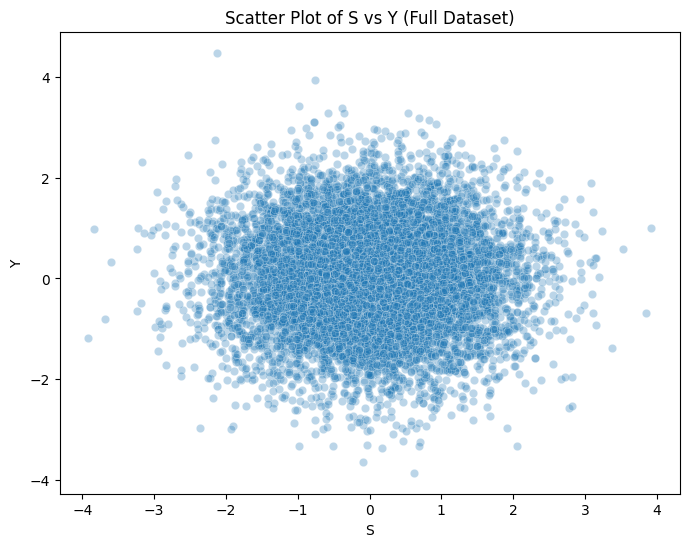

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='S', y='Y', data=data, alpha=0.3)
plt.title('Scatter Plot of S vs Y (Full Dataset)')
plt.show()

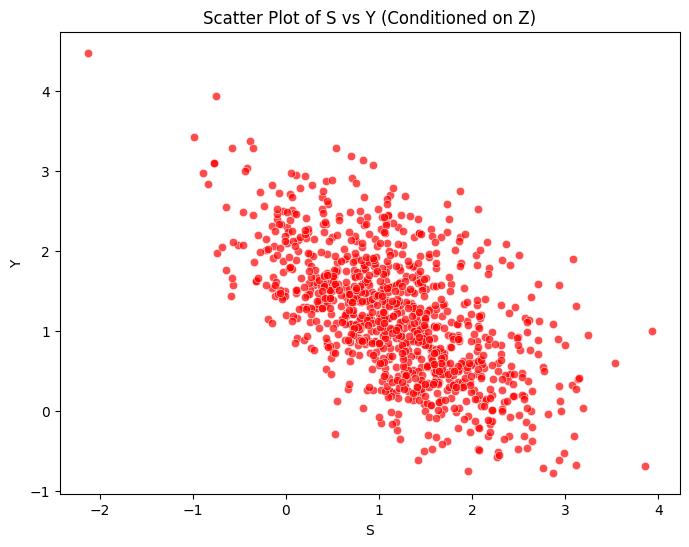

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='S', y='Y', data=data_conditioned, color='red', alpha=0.7)
plt.title('Scatter Plot of S vs Y (Conditioned on Z)')
plt.show()

We should be careful about which variables to control and reason about them based on the problem context to avoid additional bias.

## Next




- Introduction to Regression Discontinuity